<a href="https://colab.research.google.com/github/from-iqwerty-import-IQ/learning_Deep_learning/blob/master/Intershala%20Training%20/Module%202%20/Fashinon_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the libraries 

In [19]:
import keras
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import tensorflow as tf
import pydot
import numpy as np



## Loading the data sets 

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(x_train , y_train) ,(x_test , y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


## Visualising the data 

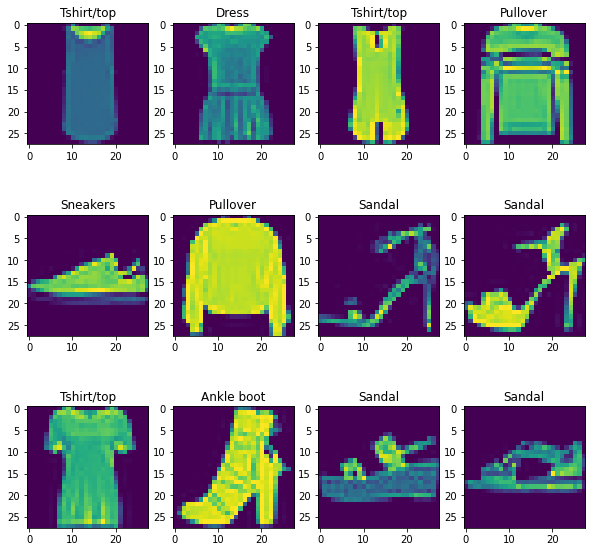

In [4]:
classes = ['Tshirt/top','Trouser','Pullover','Dress','Coat','Sandal','shirt','Sneakers','Bag','Ankle boot']
fig = plt.figure(figsize=(10, 10))
columns = 4
rows = 3
for i in range(1, columns*rows+1 ):
    img = x_train[i+1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.title(classes[y_train[i+1]])
plt.show()

## Data Normalization 
we normalize the data so that they are in the same scale (0-1).

In [5]:
x_train = x_train /255.
x_test = x_test /255.

## Spliting the data into train/validation Dataset

**Training data** -> used for training the model 

**Validation data** -> used for tuning the hyerparameters and evaluate the models 

In [6]:
x_valid ,x_train = x_train[:5000],x_train[5000:]
y_valid, y_train = y_train[:5000],y_train[5000:]


**seeding the data so the inputs weights remains the same every time the model runs**

In [20]:
np.random.seed(42)
tf.random.set_seed(42)

## Building the model 

In [21]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                3010      
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

## Training 

In [25]:
trained_model = model.fit(x_train,y_train,epochs=70,validation_data=(x_valid,y_valid))

Epoch 1/70
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4089 - accuracy: 0.8573 - val_loss: 0.3996 - val_accuracy: 0.8632
Epoch 2/70
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3898 - accuracy: 0.8626 - val_loss: 0.3763 - val_accuracy: 0.8688
Epoch 3/70
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3738 - accuracy: 0.8679 - val_loss: 0.4494 - val_accuracy: 0.8300
Epoch 4/70
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3623 - accuracy: 0.8727 - val_loss: 0.3586 - val_accuracy: 0.8768
Epoch 5/70
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3527 - accuracy: 0.8759 - val_loss: 0.3515 - val_accuracy: 0.8756
Epoch 6/70
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3400 - accuracy: 0.8797 - val_loss: 0.3481 - val_accuracy: 0.8788
Epoch 7/70
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3318 - accuracy: 0.8823 - val_loss: 0.3426 - val_accuracy:

### Visualisation of the trainning 

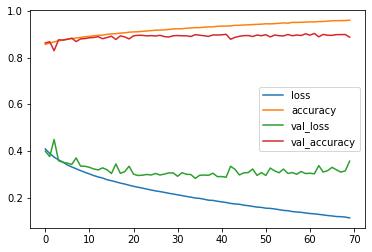

In [26]:
import pandas as pd

pd.DataFrame(trained_model.history).plot()
plt.show()

## Evaluating and predicting 

In [29]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3816 - accuracy: 0.8816


[0.38160058856010437, 0.881600022315979]

In [40]:
import random
x_new = x_test[:3]

In [43]:
y_probab = model.predict(x_new)
print(y_probab.round(2))

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  ]
 [0.   0.   0.9  0.   0.09 0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]]


In [45]:
y_class = model.predict_classes(x_new)
y_class

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1])

In [67]:
for i in y_class:
  print(classes[i])

Ankle boot
Pullover
Trouser


Ankle boot


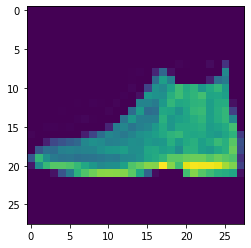

In [78]:
plt.imshow(x_test[0])
print(classes[y_class[0]])




Pullover


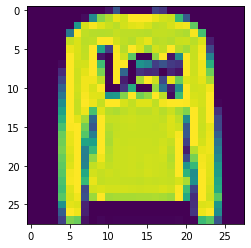

In [81]:
plt.imshow(x_test[1])
print(classes[y_class[1]])


Trouser


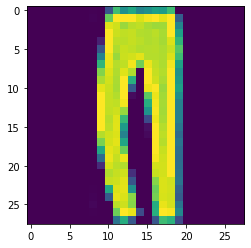

In [82]:

plt.imshow(x_test[2])
print(classes[y_class[2]])